<a href="https://colab.research.google.com/github/mdaugherity/Numerical-2021/blob/main/random/Week_10_MC_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# GENERATING RANDOM NUMBERS


Docs:
* https://numpy.org/doc/stable/reference/random/generator.html?highlight=generator#numpy.random.Generator 


## Old Way

In [2]:
np.random.rand(2)   # rand(shape):  uniform from 0 to 1

array([0.4467948 , 0.97106191])

In [3]:
np.random.randn(5) # randn(shape):  normal (gaussian with mean=0, std=1)

array([-1.20904141,  0.39939233, -0.86789783,  0.15223895,  0.32576852])

In [4]:
np.random.randint(0,10,(2,2)) # randint(low,high,shape):  integers from low to high-1 

array([[6, 0],
       [2, 0]])

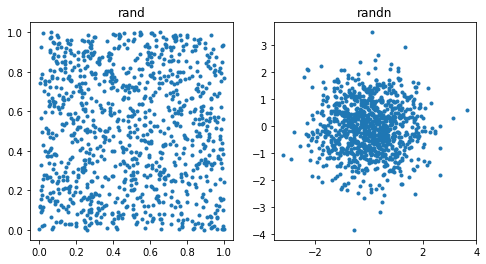

In [5]:
# Show difference between rand and randn
N = 1000 # number of points

x = np.random.rand(N)  # uniform randoms
y = np.random.rand(N)

xn = np.random.randn(N)  # normal randoms
yn = np.random.randn(N)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x,y,'.')
plt.title('rand')

plt.subplot(1,2,2)
plt.plot(xn,yn,'.')
plt.title('randn')

plt.show()

# New Way

In [6]:
rng = np.random.default_rng()  # can pass a seed here if you want the same random numbers each time

In [7]:
rng.random(3) # rand(shape):  uniform from 0 to 1

array([0.3799017 , 0.32659876, 0.57934428])

In [8]:
rng.uniform(-2,4,(3,3))  # uniform(low,high,shape):  uniform floats from low to high

array([[ 3.98762611,  3.89730067, -0.04100915],
       [-0.8674359 ,  1.73950148,  2.28653989],
       [ 3.47383775,  3.31914494,  2.11447272]])

In [9]:
rng.integers(0,2,8)  # integers(low,high,shape): ints from low to high-1

array([0, 0, 0, 0, 0, 1, 0, 1])

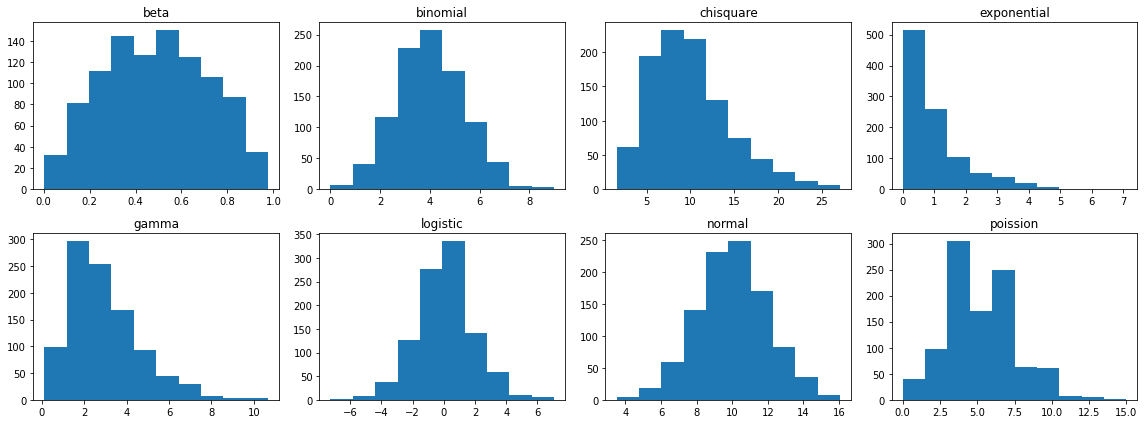

In [10]:
N = 1000 # random points
NUM = 8  # different distributions
x = np.zeros((NUM,N))

names = ('beta','binomial','chisquare','exponential','gamma','logistic','normal','poission')
x[0] = rng.beta(2,2,N)
x[1] = rng.binomial(10, 0.4, N)
x[2] = rng.chisquare(10,N)
x[3] = rng.exponential(1,N)
x[4] = rng.gamma(3,1,N)
x[5] = rng.logistic(size=N)
x[6] = rng.normal(10,2,N)
x[7] = rng.poisson(5,N)

plt.figure(figsize=(16,6))
for i in range(NUM):
  plt.subplot(2,4,i+1)
  plt.hist(x[i])
  plt.title(names[i])

plt.tight_layout()
plt.show()

# PROBLEM 1 - Find Pi with Monte Carlo Integration

In [11]:
N = 100000 # how many to throw

hits = 0
for i in range(N):
  x = np.random.rand()
  y = np.random.rand()
  if x**2 + y**2 <1:
    hits+=1

print('Hits = ',hits,'of',N)
#plt.plot(x,y,'.')
frac = hits / N
pi = frac*4
print('Pi is EXACTLY',pi)

Hits =  78456 of 100000
Pi is EXACTLY 3.13824


## Unnecessary Plot

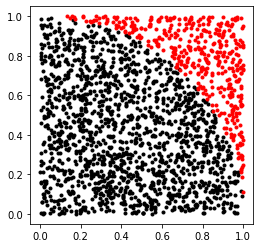

In [12]:
x = np.random.rand(2,2000)
r2 = x[0]**2 + x[1]**2

plt.figure(figsize=(4,4))
plt.plot(x[0][r2<1], x[1][r2<1],'k.')
plt.plot(x[0][r2>1], x[1][r2>1],'r.')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

# MC Integration - Throwing Method

Use Monte Carlo integrationto find $\int_a^b f(x) dx$.   

Algorithm:
* choose random $x \in [a,b]$
* choose random $y$ in range covering at least min and max values of $f(x)$
* count as "hit" if $y< f(x)$
* repeat N times

Then final integral is approximately the bounded area of x and y times the fraction of hits.

**Note:** Don't use this on any "real" problems, there is a better method below...



In [14]:
from scipy.integrate import quad

In [16]:
def f(x):  # function to integrate
  return x

# PARAMETERS TO ADJUST
a = 0
b = 4
N = 10000
ymin = 0
ymax = 5

# THROWING METHOD
rng = np.random.default_rng() 
hits = 0
for i in range(N):
  x = rng.uniform(a,b)
  y = rng.uniform(ymin,ymax)
  if y<f(x):
    hits+=1

print('Hits = ',hits,'of',N)
#plt.plot(x,y,'.')
frac = hits / N
area = frac*(b-a)*(ymax-ymin)
print('MC:\t',area)
print('quad:\t', quad(f,a,b)[0])


Hits =  4014 of 10000
MC:	 8.027999999999999
quad:	 8.0


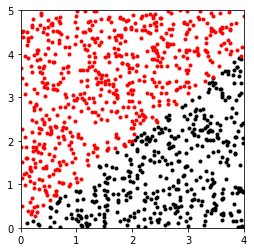

In [24]:
# UNNECESSARY PLOT
a = 0
b = 4
N = 1000
ymin = 0
ymax = 5
x = rng.uniform(a,b,N)
y = rng.uniform(ymin,ymax,N)
fx = f(x)

plt.figure(figsize=(4,4))
plt.plot(x[y<fx], y[y<fx],'k.')
plt.plot(x[y>fx], y[y>fx],'r.')
plt.xlim(a,b)
plt.ylim(ymin,ymax)
plt.show()

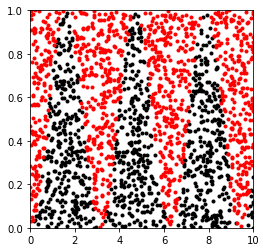

In [29]:
# UNNECESSARY PLOT
def f(x):  # function to integrate
  return np.sin(x)**2

a = 0
b = 10
N = 2000
ymin = 0
ymax = 1
x = rng.uniform(a,b,N)
y = rng.uniform(ymin,ymax,N)
fx = f(x)

plt.figure(figsize=(4,4))
plt.plot(x[y<fx], y[y<fx],'k.')
plt.plot(x[y>fx], y[y>fx],'r.')
plt.xlim(a,b)
plt.ylim(ymin,ymax)
plt.show()

# MC Integration - Mean Value Method

A **much** better way to the MC Integration that fixes problems of the throwing method:
* no need to guess ymin and ymax
* no problems with sign changes
* runs 2x faster

Idea is simple application of the *Mean-Value Theorem*:  

$ I = \int_a^b f(x) dx = (b-a) \langle f \rangle$


We estimate the mean from random sampling 
$\langle f \rangle \approx \frac{1}{N} \Sigma f(x_i)$


In [35]:
def f(x):  # function to integrate
  return np.sin(x)

# PARAMETERS TO ADJUST
a = 0
b = 1
N = 1000

# MEAN-VALUE METHOD
rng = np.random.default_rng() 
x = rng.uniform(a,b,N)
fx = f(x)
mean = fx.mean()
print('Mean:\t',mean)

area = mean*(b-a)
print('MC:\t',area)
print('quad:\t', quad(f,a,b)[0])


Mean:	 0.410455584279647
MC:	 1.641822337118588
quad:	 1.6536436208636118


# Multi-Dimensional Integrals

Extends directly to higher dimensions.  Quick example:  
$\int_0^1 dx_1 \int_0^1 dx_2 ... \int_0^1 dx_{10} (x_1+x_2 + ... + x_{10})^2 = \frac{155}{6}$

In [51]:
# PARAMETERS TO ADJUST
a = 0
b = 1
N = 1000000

# MEAN-VALUE METHOD
rng = np.random.default_rng() 
x = rng.uniform(a,b,(N,10))
fx = x.sum(axis=1)**2
mean = fx.mean()
print('Mean:\t',mean)

area = mean*(b-a)
print('MC:\t',area)
print('exact:\t', 155/6)

Mean:	 25.83717320999277
MC:	 25.83717320999277
exact:	 25.833333333333332
